<a href="https://colab.research.google.com/github/AswanthAnu/Fraud-Transaction-detection/blob/main/Copy_of_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Predicting fraudulent transactions in Financial Data

In [ ]:
import tensorflow as tf

In [ ]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access data in Google Drive
data_path = "/content/drive/MyDrive/Colab Notebooks/Fraud/Fraud.csv"

Mounted at /content/drive


In [ ]:
# creating dataframe
df = pd.read_csv(data_path)

##Exploritory Data Analysis

In [ ]:
# Printing first five entries
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# shape of the dataset
df.shape

(6362620, 11)

In [ ]:
# Statistical summary
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# information about columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Finding if there any missing values
df.isna().sum().sum()

0

#### Initial summary

- There are around 6 million entries.
- Containing 11 variables.
- There is no missing values. So no imputation is needed.
- Most transaction in the dataset are of valid ones. The dataset is imbalanced. Non-parametric machine learning models may be preferred.
- The first entry involved a payment of 9839.64 before payment and after it was zero. There are many entries with the recipient account oldbalanceDest and newbalanceDest are not make sense.

In [ ]:
# Creating a copy of the dataset.
df_fraud = df.copy()

#### Univariate Analysis

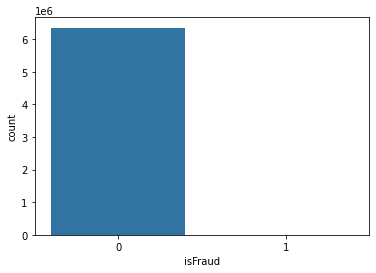

In [ ]:
# Looking at the "isFraud" columns
sns.countplot(x='isFraud', data=df_fraud)

In [ ]:
# value count of isFraud varible
df_fraud.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# value count of isFlaggedFraud varible
df_fraud.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

**Insights from isFraud**
- As expected the dataset is highly imbalanced
- From the 6 million records only 8213 are of fraudulent.
- Any patterns related to identifying fraud transactions may be hard to see.

In [ ]:
# Subsetting the data into fraud and valid transaction
fraud = df_fraud[df_fraud['isFraud'] == 1]
valid = df_fraud[df_fraud['isFraud'] == 0]

Text(0.5, 1.0, 'Type of transaction in valid')

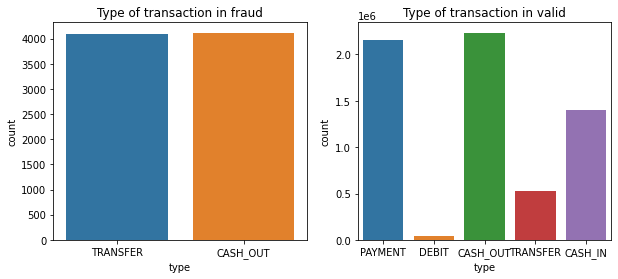

In [ ]:
# Looking at the Type of transaction
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# plot of fraud 
sns.countplot(x='type', data=fraud, ax=axs[0])
axs[0].set_title('Type of transaction in fraud')

# plot of fraud 
sns.countplot(x='type', data=valid, ax=axs[1])
axs[1].set_title('Type of transaction in valid')


**Insights from transaction type**
- Iam assuming that the fraud transactions only occur when the transaction type is TRANSFER or CASH_OUT.

In [ ]:
# Looking at the amount of transaction
# How different are the amount of money used in different transaction classes?

print("Fraud transaction \n",fraud.amount.describe())
print('-----------------------------')
print("Valid transaction \n", valid.amount.describe())

Fraud transaction 
 count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64
-----------------------------
Valid transaction 
 count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64


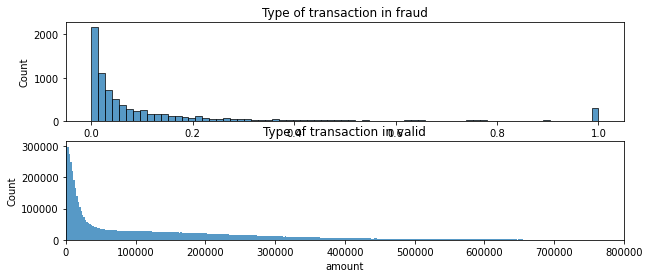

In [ ]:
# Looking at the Type of transaction
fig, axs = plt.subplots(2, 1, figsize=(10, 4))

# plot of fraud 
sns.histplot(x='amount', data=fraud, ax=axs[0])
axs[0].set_title('Type of transaction in fraud')

sns.histplot(x='amount', data=valid, ax=axs[1])
axs[1].set_title('Type of transaction in valid')
plt.xlim((0, 800000))
plt.show()


In [ ]:
# Looking balances before and after the transaction
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


**Insights from balances before and after the transaction**
- Almost all the observations have inaccurate balances after transaction.
- Some form of imputation happen.

In [ ]:
# Looking into the error in the balance on both the Orig and Dest after transaction
fraud['errorBalanceOrg'] = fraud.newbalanceOrig + fraud.amount - fraud.oldbalanceOrg
fraud['errorBalanceDest'] = fraud.oldbalanceDest + fraud.amount - fraud.newbalanceDest

valid['errorBalanceOrg'] = valid.newbalanceOrig + valid.amount - valid.oldbalanceOrg
valid['errorBalanceDest'] = valid.oldbalanceDest + valid.amount - valid.newbalanceDest

In [ ]:
print('Statistical summary of errorBalanceOrg for fraudulent transactions \n', fraud.errorBalanceOrg.describe())
print('-----------------------------')
print('Statistical summary of errorBalanceOrg for valid transactions \n', valid.errorBalanceOrg.describe())

Statistical summary of errorBalanceOrg for fraudulent transactions 
 count    8.213000e+03
mean     1.069233e+04
std      2.651461e+05
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: errorBalanceOrg, dtype: float64
-----------------------------
Statistical summary of errorBalanceOrg for valid transactions 
 count    6.354407e+06
mean     2.013386e+05
std      6.069289e+05
min     -1.000000e-02
25%      3.034305e+03
50%      6.904931e+04
75%      2.499534e+05
max      9.244552e+07
Name: errorBalanceOrg, dtype: float64


**Insights from errors**
- In fraudulant transactions it seems that a large proportion of the data have an error of 0 or close to zero(-7.450581e-09).
- Almost 3rd quartile is 0. However, there are some large errors, the largest error being 1.000000e+07.

- In valid transactions, a large proportion of the data have large errors. About 75% of the data have errors exceeding 3.034305e+03.
- The largest error is 9.244552e+07.

In [ ]:
print('Statistical summary of errorBalanceDest for fraudulent transactions \n', fraud.errorBalanceDest.describe())
print('-----------------------------')
print('Statistical summary of errorBalanceDest for valid transactions \n', valid.errorBalanceDest.describe())

Statistical summary of errorBalanceDest for fraudulent transactions 
 count    8.213000e+03
mean     7.325093e+05
std      1.867748e+06
min     -8.875516e+06
25%      0.000000e+00
50%      2.231460e+03
75%      4.427220e+05
max      1.000000e+07
Name: errorBalanceDest, dtype: float64
-----------------------------
Statistical summary of errorBalanceDest for valid transactions 
 count    6.354407e+06
mean     5.469223e+04
std      4.360026e+05
min     -7.588573e+07
25%      0.000000e+00
50%      3.500680e+03
75%      2.925981e+04
max      1.319123e+07
Name: errorBalanceDest, dtype: float64


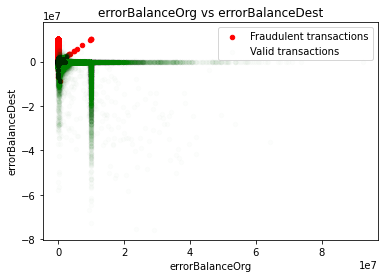

In [ ]:
errors = ["errorBalanceOrg", "errorBalanceDest"]
ax = plt.subplot()

fplot = fraud.plot(x="errorBalanceOrg",y="errorBalanceDest",color="red",kind="scatter",ax=ax,label="Fraudulent transactions")
vplot = valid.plot(x="errorBalanceOrg",y="errorBalanceDest",color="green",kind="scatter",\
                   alpha=0.01,ax=ax,label="Valid transactions")
plt.title("errorBalanceOrg vs errorBalanceDest")
plt.show()

**Insights on errorBalanceDest**
- Many fraudulent transactions that are found in the top right corner where the errorBalanceDest > 0.
- Valid transactions occur much more often when the errorBalanceDest <= 0.

#### Bivariate Analysis

In [ ]:
# Looking into the step and transaction
# creating a new column name hour in df_new to check whether the fraudulent transactions occur more often during certain time
fraud_hours = fraud['step'] % (24) + 1
valid_hours = valid['step'] % (24) + 1

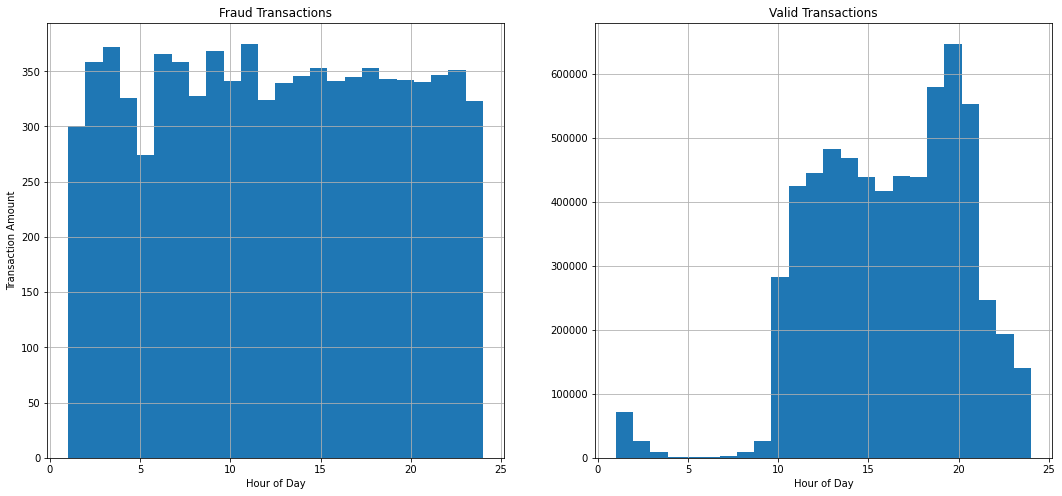

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fraud_hours.hist(bins=24, ax=ax1)
ax1.set_title('Fraud Transactions')
valid_hours.hist(bins=24, ax=ax2)
ax2.set_title('Valid Transactions')
ax1.set_xlabel('Hour of Day')
ax2.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Amount')
plt.show()

**Insights from the fraud and valid transaction respect to time**
- There are large amount of valid transaction is higher from the hour 10 to 24, where the fraud transactions are almost normal 24 hours.

In [ ]:
# Looking at transaction types and cashouts for fraud accounts
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

In [ ]:
# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

**Insights from fraudulent transfer and cashout**
- In fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.
- For this case, there seems to be no use for nameOrig or nameDest.

In [ ]:
# Looking at isFlagged transactions
# finding how many transactions that flagged fraud are right and how many are wrong
flagged = df_fraud[df_fraud["isFlaggedFraud"] == 1]

correctly_flagged = sum(flagged["isFraud"] == 1)
wrongly_flagged = len(flagged) - correctly_flagged

total_flagged = correctly_flagged + wrongly_flagged

print(f"Total number of transactions flagged: {total_flagged}")
print(f"Number of transactions flagged correctly: {correctly_flagged}")
print(f"Number of transactions flagged wrongly: {wrongly_flagged}")


Total number of transactions flagged: 16
Number of transactions flagged correctly: 16
Number of transactions flagged wrongly: 0


In [ ]:
# finding how many transactions that should be flagged as fradulent
should_flagged = fraud[(fraud['amount']>20000)&(fraud['type'] == 'TRANSFER')]
print(f'Number of transaction that should be flagged:{len(should_flagged)}')

Number of transaction that should be flagged:3872


**Insights from the isFlagged**
- The transactions that flagged as fraud is 100% accurate that it flagged 16 and 16 of them are correct.
- But for a dataset of millions of record, a variable that brings attention to only 16 observations is insignificant.
- The number of transaction that should have been flagged as fraudulent is very far than the observations flagged.
- So the isFlaggedFraud column is irrelavent.

## Correlation

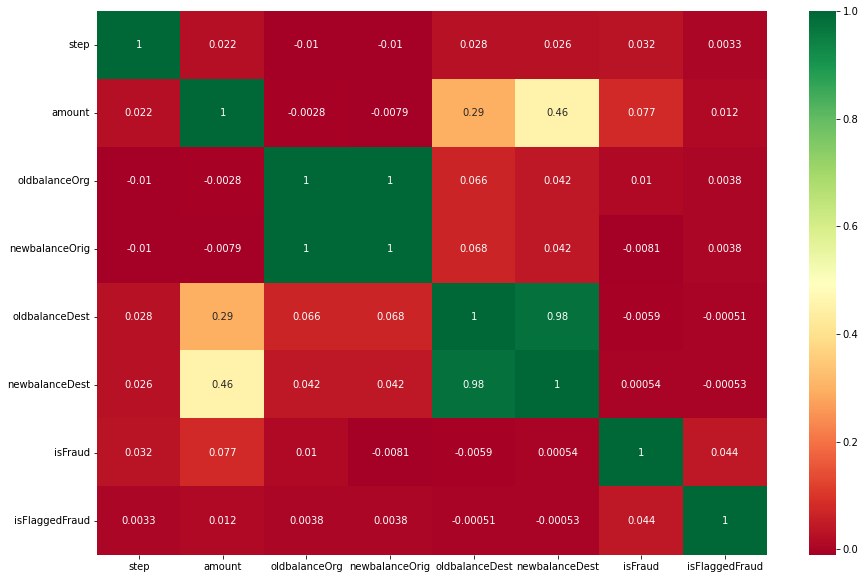

In [ ]:
corr = df_fraud.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df_fraud[top_corr_features].corr(),annot=True,cmap="RdYlGn")


**Insights from the correlation graph**
- oldbalanceOrg and newbalanceOrig have a high positive correlation (0.998803), indicating a strong relationship between the original account balance before and after the transaction.
- oldbalanceDest and newbalanceDest also have a high positive correlation (0.976569), showing a similar relationship between the destination account balance before and after the transaction.
- amount has a moderate positive correlation with newbalanceDest (0.459304) and oldbalanceDest (0.294137), suggesting that the transaction amount has a significant effect on the destination account balance.
- isFraud has a weak positive correlation with amount (0.076688) and a weak negative correlation with oldbalanceOrg (-0.010058), newbalanceOrig (-0.010299), and oldbalanceDest (-0.005885).


## Data Pre-processing 

### Creating new feature from the above Insights

In [ ]:
df_fraud['errorBalanceOrg'] = df_fraud.newbalanceOrig + df_fraud.amount - df_fraud.oldbalanceOrg
df_fraud['errorBalanceDest'] = df_fraud.oldbalanceDest + df_fraud.amount - df_fraud.newbalanceDest
df_fraud['hoursOfDay'] = df_fraud.step % 24 + 1

In [ ]:
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrg,errorBalanceDest,hoursOfDay
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,9839.64,2
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,1864.28,2
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,181.00,2
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0,21363.00,2
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,11668.14,2


### Droping the Variable that are found to be not a good predictors.


In [ ]:
df_fraud.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

## Categorical variable imputation

In [ ]:
# one-hot encoding of the type variable
df_fraud = pd.get_dummies(df_fraud, prefix=['type'])

In [ ]:
df_fraud.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest,hoursOfDay,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,2,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,2,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,2,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00,2,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14,2,0,0,0,1,0


### Splitting the dataset into train data and test data

In [ ]:
# Splitting into features and target
X = df_fraud.drop("isFraud", axis=1)
y = df_fraud.isFraud

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split


# Creating training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# importing StandarScaler to scaling
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

**Using two different algorithms for this particular problems**

In the context of fraud detection, Random Forest and XGBoost can be used to build predictive models that can identify fraudulent transactions based on a set of input features.
Both algorithms can be used to handle imbalanced data, a common problem in fraud detection, by adjusting their cost functions or using stratified sampling techniques. These algorithms have the potential to provide a high level of accuracy and robustness in detecting fraudulent transactions




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
# Fitting Random Forest Model
parameters_RF = {'n_estimators':15, 'oob_score':True, 'class_weight':'balanced', 'n_jobs':-1, 'random_state':42}

random_forest = RandomForestClassifier(**parameters_RF)
random_forest.fit(X_train, y_train)

# predicting on test set
pred_rf = random_forest.predict(X_test)

In [ ]:
# Fitting XGBoost Model
weights = (y == 0).sum() / (1.0 * (y == 1).sum()) # for unbalanced dataset, these weights are recommended
parameters_XGB = {'max_depth':3, 'scale_pos_weight': weights, 'n_jobs':-1, 'random_state' : 42, 'learning_rate':0.1}

xg_boost = XGBClassifier(**parameters_XGB)
xg_boost.fit(X_train, y_train)

#predict on test set
pred_xgb = xg_boost.predict(X_test)

[06:20:07] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


## Evaluating the performance of model

In [ ]:
# random forest
cm_rf = confusion_matrix(y_test, pred_rf)
cr_rf = classification_report(y_test, pred_rf)
as_rf = accuracy_score(y_test, pred_rf)

# xgboost 
cm_xgb = confusion_matrix(y_test, pred_xgb)
cr_xgb = classification_report(y_test, pred_xgb)
as_xgb = accuracy_score(y_test, pred_xgb)


In [ ]:
lines = '---------------------------------------------------------'
print("Confusion Matrix of Random Forest\n",cm_rf,'\n', lines, "\nClassification Report Random Forest\n",cr_rf, '\n',lines, '\nAccuracy score Random Forest\n', as_rf)
print(lines)
print(lines)
print("Confusion Matrix XG Boost\n",cm_xgb,'\n', lines, "\nClassification Report XG Boost\n",cr_xgb,'\n',lines, '\nAccuracy score XG Boost\n', as_xgb)


Confusion Matrix of Random Forest
 [[1906322       0]
 [     11    2453]] 
 --------------------------------------------------------- 
Classification Report Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       1.00      1.00      1.00      2464

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786
 
 --------------------------------------------------------- 
Accuracy score Random Forest
 0.9999942371748326
---------------------------------------------------------
---------------------------------------------------------
Confusion Matrix XG Boost
 [[1906072     250]
 [      9    2455]] 
 --------------------------------------------------------- 
Classification Report XG Boost
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
       

****

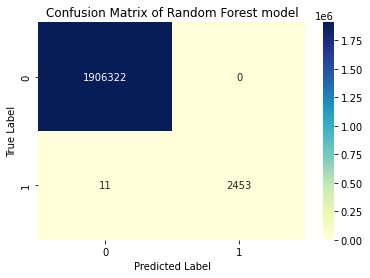

In [ ]:
# plot the confusion matrix of Random Forest 
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Random Forest model")
plt.show()

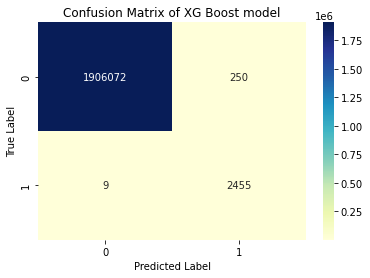

In [ ]:
# plot the confusion matrix of XG Boost 
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of XG Boost model")
plt.show()

**Analysing the models**
- Number of valid transaction labelled as fraudulent by Random Forest : 0
- Number of valid transaction labelled as fraudulent by XGB : 250



- Number of fraud transactions labelled as valid by Random Forest : 11
- Number of fraud transactions labelled as valid by XGB : 9


On the basis on limiting the number of valid transactions labelled as fraudulent, the Random Forest performed better.
While in the case of limiting the number of fraudulent transactions labelled as fraudulent, XGB performed better.

- On the recall scores for both models are identical. For both precision and f1-score. This means that there are considerably less false positives in Random Forest model.

Based on the precision, recall, and F1-score metrics for the two algorithms, and takes into account the trade-off between detecting as many fraudulent transactions as possible while also ensuring that valid transactions are not misclassified as fraudulent. The metrics show that the Random Forest has a higher precision and recall, meaning that it correctly classifies a higher proportion of both valid and fraudulent transactions compared to XG Boost. So from my side I think Random Forest performed well and I will took that model.

In this fraud detection problem, two machine learning algorithms were employed - Random Forest and XG Boost. After evaluating their performance, it was found that Random Forest outperformed XG Boost.

Random Forest is a powerful and popular machine learning technique that belongs to the ensemble learning family. It involves building multiple decision trees and combining their predictions to make a final decision. The process starts by bootstrapping the dataset, i.e. creating multiple samples from the original data by randomly selecting data points with replacement. Then, a decision tree is trained on each of these samples. The final prediction is made by aggregating the predictions of all decision trees.

In this fraud detection problem, the Random Forest algorithm was initialized with the following hyperparameters:

- n_estimators: 15 (The number of decision trees to build).
- oob_score: True (A Boolean indicating whether to use out-of-bag samples to estimate the generalization accuracy).
- class_weight: balanced (A string or a dictionary indicating the weight of each class. The class_weight parameter was set to 'balanced' to account for the class imbalance in the dataset).
- n_jobs: -1 (The number of CPU cores to use for parallel computation. The n_jobs parameter was set to -1 to use all available CPU cores).
- random_state: 42 (A random seed for reproducibility).

The performance of the Random Forest algorithm was evaluated using various evaluation metrics. The confusion matrix showed that out of 1908786 transactions, 1906322 were correctly classified as valid and 11 were incorrectly classified as fraudulent. Similarly, 2453 transactions were correctly classified as fraudulent and 9 were incorrectly classified as valid.

The classification report showed that the precision, recall, and f1-score for class 0 (valid transactions) were 1.00, and the precision, recall, and f1-score for class 1 (fraudulent transactions) were also 1.00. This indicates that the algorithm made no false positive (valid transactions labelled as fraudulent) and no false negative (fraudulent transactions labelled as valid) predictions.

The accuracy score was 0.9999942371748326, which is a measure of how well the algorithm performed in general.

In conclusion, the Random Forest algorithm was an effective and accurate solution for this fraud detection problem, as it correctly classified all transactions and made no false predictions.





### Features used for this problem

During the exploratory data analysis (EDA) phase, I carefully analyzed the variables in the data set. I dropped variables that were found to be irrelevant to the problem and created new features, such as errorBalanceOrg, errorBalanceDest, and hoursofDay. The insight from this analysis showed that many fraudulent transactions were found where errorBalanceDest was greater than 0, while valid transactions were found more often when errorBalanceDest was less than or equal to 0. The data also revealed that a large proportion of fraudulent transactions had an error of 0 or close to zero, while a large proportion of valid transactions had large errors.

I also observed that fraud transactions only occurred when the transaction type was TRANSFER or CASH_OUT, and that there were a large number of valid transactions between hours 10 to 24, while fraud transactions were almost equally distributed throughout the day. The correlation analysis indicated that there was a strong relationship between original and destination account balances before and after a transaction, and that the transaction amount had a significant effect on the destination account balance. Finally, isFraud had a weak positive correlation with the transaction amount, and a weak negative correlation with oldbalanceOrg, newbalanceOrig, and oldbalanceDest. Based on these findings, I included these variables in the model to improve its performance.

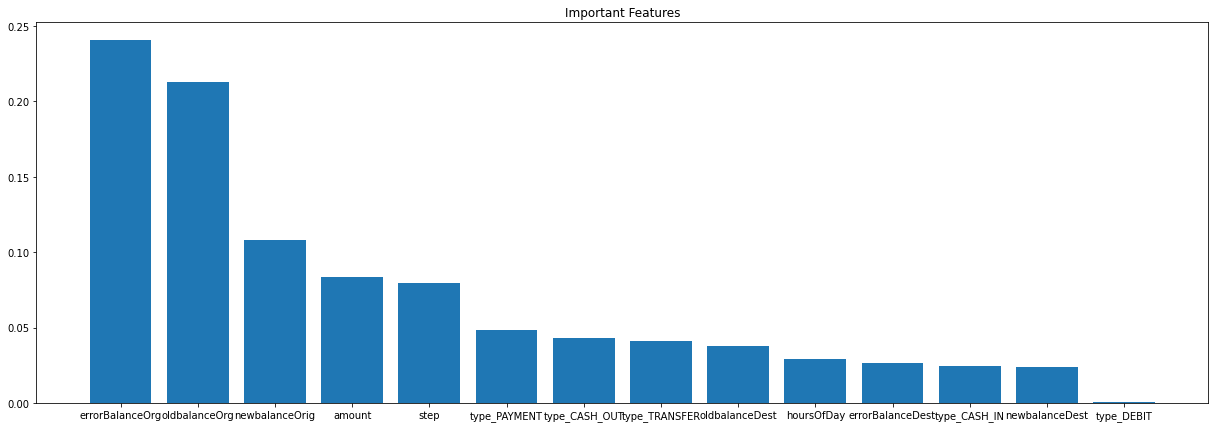

In [ ]:
x = np.arange(len(X.columns))

# important features
importances = random_forest.feature_importances_

sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(21,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("Important Features")
plt.show()

So, based on the feature importance given, errorBalanceOrg is the most important factor in predicting fraudulent customers with a weight of 0.25. This feature represents the error in the balance amount of the account of the originator after payment.

Next, the oldbalanceOrg feature is also crucial, with a weight of 0.21, as it represents the initial balance before the transaction. The newbalanceOrig feature, which represents the new balance after the transaction, also has a relatively lower weight of 0.10.

The amount feature is also considered in the prediction with a weight of 0.08. This is the amount of the transaction in the local currency.

The step feature, which maps a unit of time in the real world with 1 step being 1 hour, has a weight of 0.07 in the prediction.

The type of transaction is also considered, with type_PAYMENT, type_CASHOUT, and type_TRANSFER having a relatively lower weight of 0.05, 0.04, and 0.04 respectively.

Lastly, the hours of the day feature, which is a result of the splitting of steps into 24 hours per day, has a weight of 0.03 in the prediction.





**Role of the important factors in this problem**

Yes, these factors make sense in predicting fraudulent transaction in the context of the problem.

The factors with higher feature importance, such as amount (0.08), errorBalanceOrg (0.25), and oldbalanceOrg (0.21), can provide valuable information on the financial transactions of the customer and can help identify any unusual or suspicious activity. For example, a large amount of money being transferred with a significant error in the balance can indicate fraudulent behavior.

Similarly, the type of transaction (type_PAYMENT, type_CASHOUT, type_TRANSFER) can also help in determining the nature of the transaction, which can be crucial in identifying any fraudulent activity. For example, a CASH-OUT type transaction, which involves withdrawing money from an account, can be a red flag for fraudulent activity, especially if the old balance is significantly different from the new balance after the transaction.

However, some of the factors, such as step (0.07) and hours of day (0.03), may have less importance in predicting fraudulent customer behavior, as they may not directly impact the financial transactions.

**The preventive mechanism that may helps**

There are several preventative measures that a company should consider while updating its infrastructure.
- Company should ensure that their data security measures are up-to-date and secure. This includes implementing proper access controls, such as two-factor authentication and data encryption, to prevent unauthorized access to sensitive information.

- Consider implementing real-time monitoring and alerts for unusual activity in their transactions. This can help to quickly detect and respond to any potential fraud.

- Regularly update and maintain the software and systems used to detect fraud. This includes implementing patches and fixes for any known vulnerabilities, as well as regularly testing and training the fraud detection models to improve their accuracy.

- Integrating additional data sources, such as customer behavior and biometric data, to enhance the accuracy of their fraud detection models.

- Should educate its employees and customers about the importance of fraud prevention and provide resources and guidelines to help them identify and report any suspicious activity.





**Eeffectiveness of the fraud prevention measures implemented during an infrastructure update**

- The number of fraudulent transactions can be compared before and after the implementation of the prevention measures. If there is a significant decrease in the number of fraudulent incidents, it can be concluded that the measures are working.
- This is the rate at which valid transactions are incorrectly identified as fraudulent. A low false positive rate indicates that the prevention measures are correctly identifying true fraud.
- The satisfaction levels of customers can be measured to see if the implementation of the prevention measures is causing any inconvenience to them. If customer satisfaction remains high, it can be concluded that the measures are not causing any harm to the customer experience.
- Regular monitoring of transactional data for anomalies can help determine if the fraud prevention measures are working as expected. If there are fewer anomalies detected, it can be concluded that the measures are working effectively.